<a href="https://colab.research.google.com/github/vitorfn/EFC1-GCC253/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Vítor Ferreira Nunes

**Matricula:** 201810284

**Turma**: 10A

Link do repositório GitHub: https://github.com/vitorfn/EFC1-GCC253

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import sys

In [ ]:
def gera_arranjos_aleatorio(numElem):
  A=np.random.randint(0, 1000, (numElem))
  return A

In [ ]:
def gera_arranjo_ordenado(numElem):
  A=np.arange(start=1, stop=numElem, step=5)
  return A

In [ ]:
def gera_arranjo_desordenado(numElem):
  A=np.arange(start=numElem, stop=0, step=-5)
  return A

In [ ]:
n_elementos = np.array([i for i in range(5, 1000, 5)])

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [ ]:
def insertionSort(array):
  ini = time.time()
  nCont = 0
  for i in range(1,len(array)):
    nCont +=1
    chave = array[i]
    j = i-1

    while j >= 0 and array[j] > chave:
      nCont +=1
      array[j+1] = array[j]
      j = j-1
    
    array[j+1] = chave
    nCont += 1
    
  fim = time.time()
  tempo_exec = fim - ini
    
  return array, nCont, tempo_exec

##  Merge Sort


In [ ]:
def merge(array, start, med, end):
    aux1 = med - start + 1
    aux2 = end - med
    esq = [0] * (aux1)
    dir = [0] * (aux2)
    nComp = 0

    for i in range(0, aux1):
        nComp += 1
        esq[i] = array[start + i]
    nComp += 1 

    for j in range(0, aux2):
        nComp += 1
        dir[j] = array[med + 1 + j]
    nComp += 1 
    i = 0   
    j = 0   
    aux3 = start   


    while i < aux1 and j < aux2:
        nComp += 2 
        if dir[j] >= esq[i]:
            array[aux3] = esq[i]
            i += 1
        else:
            array[aux3] = dir[j]
            j += 1
        aux3 += 1
    nComp += 2 

    while aux1 > i:
        nComp += 1
        array[aux3] = esq[i]
        aux3 += 1
        i += 1
    nComp += 1

    while aux2 > j:
        nComp += 1
        array[aux3] = dir[j]
        aux3 += 1
        j += 1
    nComp += 1 
    return nComp
 
def mergeSort(array, start, end):
  ini = time.time()
  nComp = 0
  
  if start < end:
      med = start + (end - start) // 2
      
      contador = mergeSort(array, start, med)
      nComp += contador[2]
      
      contador == mergeSort(array, med + 1, end)
      nComp += contador[2]
      
      nComp += merge(array, start, med, end)
  fim = time.time()
  tempo_exec = fim - ini
  
  return array,tempo_exec,nComp

##  Selection Sort


In [ ]:
def selectionSort(array):
    cont = 0
    ini = time.time();    

    for i in range(len(array)):        
        for j in range(i+1,len(array)):
            cont = cont + 1
            if(array[j] < array[i]):
                array[i], array[j] = array[j], array[i]   
    
    fim = time.time()
    tempo_exec = fim - ini
    return array, tempo_exec, cont

##  Bubble Sort


In [ ]:
def bubbleSort(array):
  ini = time.time()
  aux = 1
  cont = 0

  for i in range(len(array)-1):
    if aux == 1:
      aux = 0
      for j in range(len(array - i) - 1):
        if array[j+1] < array[j]:
          cont = cont + 1
          aux2 = array[j+1]
          array[j+1] = array[j]
          array[j] = aux2
          aux = 1

  fim = time.time()
  tempo_exec = fim - ini
  
  return array, tempo_exec, cont

## Heap Sort

In [ ]:
def heapify(array, start, aux1):
	maior = aux1
	aux2 = 2 * aux1 + 1
	aux3 = 2 * aux1 + 2

	if aux2 < start and array[maior] < array[aux2]:
		maior = aux2

	if aux3 < start and array[maior] < array[aux3]:
		maior = aux3

	if maior != aux1:
		array[aux1], array[maior] = array[maior], array[aux1]
		heapify(array, start, maior)

def heapSort(array):
  ini = time.time()
  start = len(array)
  cont = 0

  for aux1 in range(start // 2 -1, -1, -1):
    heapify(array, start, aux1)
    cont += 1

  for aux1 in range(start -1, 0, -1):
    array[aux1], array[0] = array[0], array[aux1] 
    heapify(array, aux1, 0)
    cont += 1

  fim = time.time()
  tempo_exec = fim - ini
  return array, tempo_exec, cont

## Quick Sort

> pivo = *A[A-comprimento]*

In [ ]:
def partition(array, start, end, nComp):
  aux1 = array[end]
  i = start - 1
  
  for j in range(start, end - 1):
    if aux1 >= array[j]:
      nComp = nComp + 1
      i = i + 1
      array[i], array[j] = array[j], array[i]
  
  array[i+1], array[end] = array[end], array[i+1]
  return (i + 1), nComp

def quick(array, start, end, nComp):
  if start < end:
    nComp = nComp + 1
    meio, nComp = partition(array, start, end, nComp)
    quick(array,start,meio-1, nComp)
    quick(array,meio+1,end, nComp)
  return array, nComp

def quickSort(array):
  ini = time.time()
  nComp = 1
  array, nComp = quick(array, 0, len(array)-1, nComp)
  fim = time.time()
  temp_exec = fim - ini
  return array, temp_exec, nComp

# Questões

## 1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

In [ ]:
arrAsc = gera_arranjo_ordenado(1000)
arrDesc = gera_arranjo_desordenado(1000)
arrRand = gera_arranjos_aleatorio(200)

print(arrAsc)
print(arrDesc)
print(arrRand)


[  1   6  11  16  21  26  31  36  41  46  51  56  61  66  71  76  81  86
  91  96 101 106 111 116 121 126 131 136 141 146 151 156 161 166 171 176
 181 186 191 196 201 206 211 216 221 226 231 236 241 246 251 256 261 266
 271 276 281 286 291 296 301 306 311 316 321 326 331 336 341 346 351 356
 361 366 371 376 381 386 391 396 401 406 411 416 421 426 431 436 441 446
 451 456 461 466 471 476 481 486 491 496 501 506 511 516 521 526 531 536
 541 546 551 556 561 566 571 576 581 586 591 596 601 606 611 616 621 626
 631 636 641 646 651 656 661 666 671 676 681 686 691 696 701 706 711 716
 721 726 731 736 741 746 751 756 761 766 771 776 781 786 791 796 801 806
 811 816 821 826 831 836 841 846 851 856 861 866 871 876 881 886 891 896
 901 906 911 916 921 926 931 936 941 946 951 956 961 966 971 976 981 986
 991 996]
[1000  995  990  985  980  975  970  965  960  955  950  945  940  935
  930  925  920  915  910  905  900  895  890  885  880  875  870  865
  860  855  850  845  840  835  830  825  820

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.


### Insertion Sort

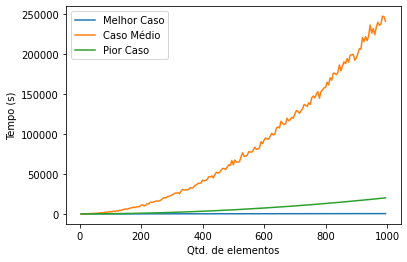

In [ ]:
# Insertion Sort
# Melhor caso: array já ordenado (crescente)
# Pior caso: array ordenado (decrescente)

bIns = []
mIns = []
wIns = []
bInsTime = []
mInsTime = []
wInsTime = []
bInsCont = []
mInsCont = []
wInsCont = []

for i in range (5, 1000, 5):
  array = gera_arranjo_ordenado(i)
  bIns.append(insertionSort(array))
  array= gera_arranjo_desordenado(i)
  wIns.append(insertionSort(array))
  array = gera_arranjos_aleatorio(i)
  mIns.append(insertionSort(array))

for i in range(len(bIns)):
  bInsTime.append(bIns[i][1])
  mInsTime.append(mIns[i][1])
  wInsTime.append(wIns[i][1])
  bInsCont.append(bIns[i][2])
  mInsCont.append(mIns[i][2])
  wInsCont.append(wIns[i][2])

plt.plot(n_elementos, bInsTime, label = "Melhor Caso")
plt.plot(n_elementos, mInsTime, label = "Caso Médio")
plt.plot(n_elementos, wInsTime, label = "Pior Caso")
plt.ylabel('Tempo (s)')
plt.xlabel('Qtd. de elementos')
plt.legend()
plt.show()

### Merge Sort

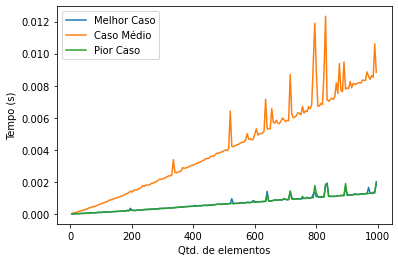

In [ ]:
# Merge Sort
# Melhor caso e pior caso: iguais

bMerg = []
mMerg = []
wMerg = []
bMergTime = []
mMergTime = []
wMergTime = []
bMergCont = []
mMergCont = []
wMergCont = []

for i in range (5, 1000, 5):
  array = gera_arranjo_ordenado(i)
  bMerg.append(mergeSort(array, 0,len(array)-1))
  array= gera_arranjo_desordenado(i)
  wMerg.append(mergeSort(array, 0,len(array)-1))
  array = gera_arranjos_aleatorio(i)
  mMerg.append(mergeSort(array, 0,len(array)-1))

for i in range(len(bMerg)):
  bMergTime.append(bMerg[i][1])
  mMergTime.append(mMerg[i][1])
  wMergTime.append(wMerg[i][1])
  bMergCont.append(bMerg[i][2])
  mMergCont.append(mMerg[i][2])
  wMergCont.append(wMerg[i][2])

plt.plot(n_elementos, bMergTime, label = "Melhor Caso")
plt.plot(n_elementos, mMergTime, label = "Caso Médio")
plt.plot(n_elementos, wMergTime, label = "Pior Caso")
plt.ylabel('Tempo (s)')
plt.xlabel('Qtd. de elementos')
plt.legend()
plt.show()

### Selection Sort

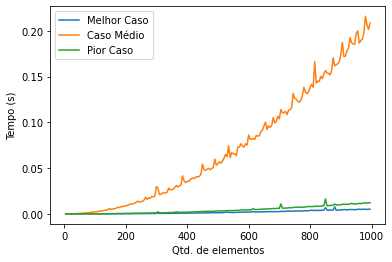

In [ ]:
# Selection Sort
# Melhor caso e pior caso: iguais

bSel = []
mSel = []
wSel = []
bSelTime = []
mSelTime = []
wSelTime = []
bSelCont = []
mSelCont = []
wSelCont = []

for i in range (5, 1000, 5):
  array = gera_arranjo_ordenado(i)
  bSel.append(selectionSort(array))
  array= gera_arranjo_desordenado(i)
  wSel.append(selectionSort(array))
  array = gera_arranjos_aleatorio(i)
  mSel.append(selectionSort(array))

for i in range(len(bSel)):
  bSelTime.append(bSel[i][1])
  mSelTime.append(mSel[i][1])
  wSelTime.append(wSel[i][1])
  bSelCont.append(bSel[i][2])
  mSelCont.append(mSel[i][2])
  wSelCont.append(wSel[i][2])

plt.plot(n_elementos, bSelTime, label = "Melhor Caso")
plt.plot(n_elementos, mSelTime, label = "Caso Médio")
plt.plot(n_elementos, wSelTime, label = "Pior Caso")
plt.ylabel('Tempo (s)')
plt.xlabel('Qtd. de elementos')
plt.legend()
plt.show()

### Bubble Sort

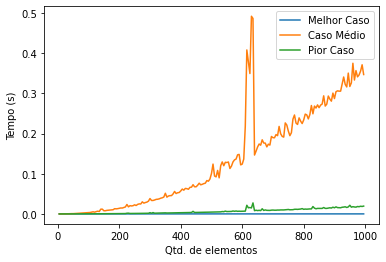

In [ ]:
# Bubble Sort
# Melhor caso: crescente
# Pior caso: decrescente

bBub = []
mBub = []
wBub = []
bBubTime = []
mBubTime = []
wBubTime = []
bBubCont = []
mBubCont = []
wBubCont = []

for i in range (5, 1000, 5):
  array = gera_arranjo_ordenado(i)
  bBub.append(bubbleSort(array))
  array= gera_arranjo_desordenado(i)
  wBub.append(bubbleSort(array))
  array = gera_arranjos_aleatorio(i)
  mBub.append(bubbleSort(array))

for i in range(len(bBub)):
  bBubTime.append(bBub[i][1])
  mBubTime.append(mBub[i][1])
  wBubTime.append(wBub[i][1])
  bBubCont.append(bBub[i][2])
  mBubCont.append(mBub[i][2])
  wBubCont.append(wBub[i][2])

plt.plot(n_elementos, bBubTime, label = "Melhor Caso")
plt.plot(n_elementos, mBubTime, label = "Caso Médio")
plt.plot(n_elementos, wBubTime, label = "Pior Caso")
plt.ylabel('Tempo (s)')
plt.xlabel('Qtd. de elementos')
plt.legend()
plt.show()

### Heap Sort

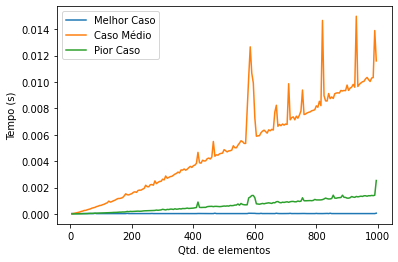

In [ ]:
# Heap Sort
# Melhor caso: elementos iguais
# Pior caso: todos serem diferentes

bHeap = []
mHeap = []
wHeap = []
bHeapTime = []
mHeapTime = []
wHeapTime = []
bHeapCont = []
mHeapCont = []
wHeapCont = []

for i in range (5, 1000, 5):
  array = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  bHeap.append(heapSort(array))
  array= gera_arranjo_desordenado(i)
  wHeap.append(heapSort(array))
  array = gera_arranjos_aleatorio(i)
  mHeap.append(heapSort(array))

for i in range(len(bHeap)):
  bHeapTime.append(bHeap[i][1])
  mHeapTime.append(mHeap[i][1])
  wHeapTime.append(wHeap[i][1])
  bHeapCont.append(bHeap[i][2])
  mHeapCont.append(mHeap[i][2])
  wHeapCont.append(wHeap[i][2])

plt.plot(n_elementos, bHeapTime, label = "Melhor Caso")
plt.plot(n_elementos, mHeapTime, label = "Caso Médio")
plt.plot(n_elementos, wHeapTime, label = "Pior Caso")
plt.ylabel('Tempo (s)')
plt.xlabel('Qtd. de elementos')
plt.legend()
plt.show()

### Quick Sort

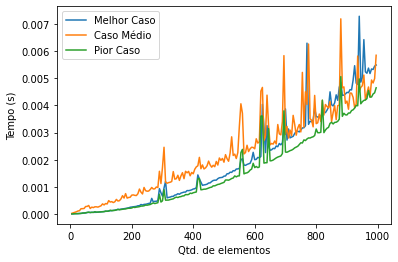

In [ ]:
# Quick Sort
# Melhor caso e pior caso: iguais

bQuick = []
mQuick = []
wQuick = []
bQuickTime = []
mQuickTime = []
wQuickTime = []
bQuickCont = []
mQuickCont = []
wQuickCont = []

for i in range (5, 1000, 5):
  array = gera_arranjo_ordenado(i)
  bQuick.append(quickSort(array))
  array= gera_arranjo_desordenado(i)
  wQuick.append(quickSort(array))
  array = gera_arranjos_aleatorio(i)
  mQuick.append(quickSort(array))

for i in range(len(bQuick)):
  bQuickTime.append(bQuick[i][1])
  mQuickTime.append(mQuick[i][1])
  wQuickTime.append(wQuick[i][1])
  bQuickCont.append(bQuick[i][2])
  mQuickCont.append(mQuick[i][2])
  wQuickCont.append(wQuick[i][2])

plt.plot(n_elementos, bQuickTime, label = "Melhor Caso")
plt.plot(n_elementos, mQuickTime, label = "Caso Médio")
plt.plot(n_elementos, wQuickTime, label = "Pior Caso")
plt.ylabel('Tempo (s)')
plt.xlabel('Qtd. de elementos')
plt.legend()
plt.show()

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.



Complexidades:

* Insertion Sort
  * Melhor caso: 𝛀(n)	
  * Pior caso: O(n²)	
  * Caso aleatório: Θ(n²)
* Merge Sort
  * Melhor caso: 𝛀(n * log(n))
  * Pior caso: O(n * log(n))
  * Caso aleatório: Θ(n * log(n))
* Selection Sort
  * Melhor caso: 𝛀(n²)
  * Pior caso: O(n²)	
  * Caso aleatório: Θ(n²)
* Bubble Sort
  * Melhor caso: 𝛀(n)	
  * Pior caso: O(n²)
  * Caso aleatório: Θ(n²)
* Heap Sort
  * Melhor caso: 𝛀(n * log(n))
  * Pior caso: O(n * log(n))
  * Caso aleatório: Θ(n * log(n))
* Quick Sort
  * Melhor caso: 𝛀(n * log(n))
  * Pior caso: O(n * log(n))
  * Caso aleatório: Θ(n * log(n))

## 2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.

A versão aleatorizada do Quick Sort visa resolver os piores casos, fazendo com que tenha uma diminuição da probabilidade de ocorrência. Assim, a execução desse código é mais rápida.


In [ ]:
def partition(arranjo,p,r,comp):
  pivo = arranjo[np.random.randint(0, r)]
  i = p
  comp+=1 
  for j in range(p, r):
    comp+=1
    if arranjo[j]<=pivo:
      aux = arranjo[i]
      arranjo[i] = arranjo[j]
      arranjo[j] = aux
      i+=1
  comp+=1
      

  aux = arranjo[i]
  arranjo[i] = arranjo[r]
  arranjo[r] = aux
  return i, comp


def quickA(array, start, end, nComp):
  if start < end:
    nComp = nComp + 1
    meio, nComp = partition(array, start, end, nComp)
    quickA(array,start,meio-1, nComp)
    quickA(array,meio+1,end, nComp)
  return array, nComp

def quickSortA(array):
  ini = time.time()
  nComp = 1
  array, nComp = quickA(array, 0, len(array)-1, nComp)
  fim = time.time()
  temp_exec = fim - ini
  return array, temp_exec, nComp

In [ ]:
arrOrd = gera_arranjo_desordenado(1000)
print(arrOrd)

print(quickSortA(arrOrd)[1])
print(quickSort(arrOrd)[1])

[1000  995  990  985  980  975  970  965  960  955  950  945  940  935
  930  925  920  915  910  905  900  895  890  885  880  875  870  865
  860  855  850  845  840  835  830  825  820  815  810  805  800  795
  790  785  780  775  770  765  760  755  750  745  740  735  730  725
  720  715  710  705  700  695  690  685  680  675  670  665  660  655
  650  645  640  635  630  625  620  615  610  605  600  595  590  585
  580  575  570  565  560  555  550  545  540  535  530  525  520  515
  510  505  500  495  490  485  480  475  470  465  460  455  450  445
  440  435  430  425  420  415  410  405  400  395  390  385  380  375
  370  365  360  355  350  345  340  335  330  325  320  315  310  305
  300  295  290  285  280  275  270  265  260  255  250  245  240  235
  230  225  220  215  210  205  200  195  190  185  180  175  170  165
  160  155  150  145  140  135  130  125  120  115  110  105  100   95
   90   85   80   75   70   65   60   55   50   45   40   35   30   25
   20 

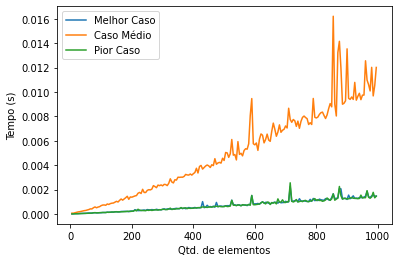

In [ ]:
# Quick Sort Aleat
# Melhor caso e pior caso: iguais

bQuick = []
mQuick = []
wQuick = []
bQuickTime = []
mQuickTime = []
wQuickTime = []
bQuickCont = []
mQuickCont = []
wQuickCont = []

for i in range (5, 1000, 5):
  array = gera_arranjo_ordenado(i)
  bQuick.append(quickSort(array))
  array= gera_arranjo_desordenado(i)
  wQuick.append(quickSort(array))
  array = gera_arranjos_aleatorio(i)
  mQuick.append(quickSort(array))

for i in range(len(bQuick)):
  bQuickTime.append(bQuick[i][1])
  mQuickTime.append(mQuick[i][1])
  wQuickTime.append(wQuick[i][1])
  bQuickCont.append(bQuick[i][2])
  mQuickCont.append(mQuick[i][2])
  wQuickCont.append(wQuick[i][2])

plt.plot(n_elementos, bQuickTime, label = "Melhor Caso")
plt.plot(n_elementos, mQuickTime, label = "Caso Médio")
plt.plot(n_elementos, wQuickTime, label = "Pior Caso")
plt.ylabel('Tempo (s)')
plt.xlabel('Qtd. de elementos')
plt.legend()
plt.show()

In [ ]:
print("Boa sorte!!!")

Boa sorte!!!
